<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKursCdV/blob/main/07_01_Faltunsgnetze_Einf%C3%BChrung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Was ist ein Faltungsnetz?**

###**Faltungsschichten**

Bevor wir ein Faltungsnetz (= Convolutional Neural Network) auf ein konkretes Problem anwenden, schauen wir uns erst einmal die Struktur an.

Zunächst importieren wir zwei neue Schichttypen

`Conv2D`

und

`MaxPool2D`

In [ ]:
from keras.layers import Input, Flatten, Dense, Softmax, Conv2D, MaxPool2D
from keras.models import Model

Ein Conv2D (= zweidimensionale Faltungsschicht) hat unabhängig vom Training (also der Einstellung der Gewichte und Bias-Werte) folgende wichtige Eigenschaften:

*   Anzahl der Filter (Argument `filters`)
*   Form der Filter (Argument `kernel_size`)





Die folgenden beiden Bilder machen deutlich, wie eine Conv2D Schicht mit nur einem Filter und der `kernel_size` (= shape) `(3, 3)` arbeitet:

Der Filter läuft, Zeile für Zeile, Spalte für Spalte über die Eingabe...

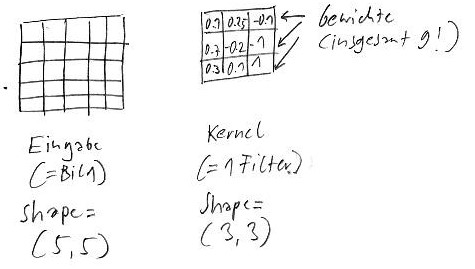

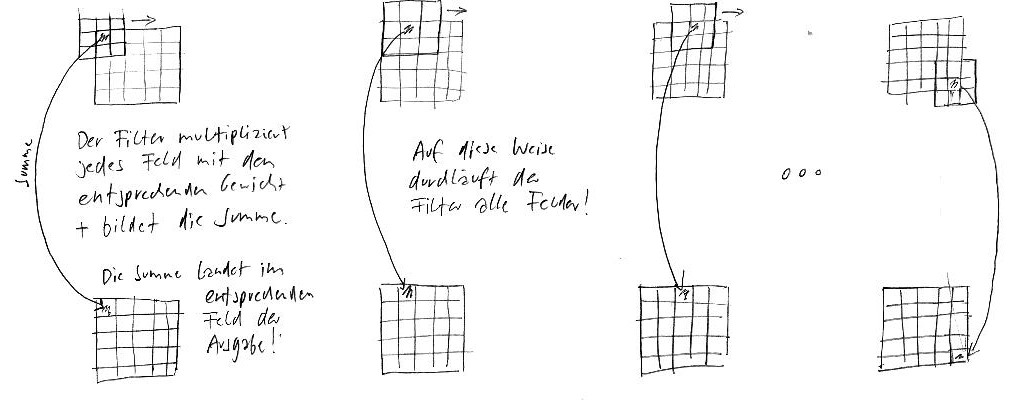


In der Regel ist es bei Faltungsschichten gewünscht, dass der Ausgang (Output Shape) die selbe Form hat, wie der Eingang (Input Shape).

Zu diesem Behufe werden die Ränder mit Nullen aufgefüllt. Bei einer kernel_size von (3,3) hat der Rand die Breite 1. Bei einer kernel_size von (5,5) wäre die Randbreite 2.

Das gezeigte Verhalten wird mit dem Argument `padding='same'` erreicht.

Ohne Padding wäre das Ergebnis einer Eingabe mit der Form (25,25) eine Ausgabe in der Form (23,23)!

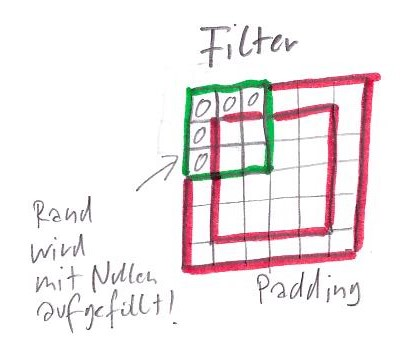

Im folgenden konstruieren wir sehr ein einfaches Faltunsnetz mit lediglich einer Faltungsschicht und einem Filter, um den Aufbau zu verstehen.

In [ ]:
# Selbst, wenn wir nur ein Graustufenbild verarbeiten wollen, brauchen wir eine dritte Dimension:
input_layer = Input((25,25,1))

# Beachte: in diesem Fall behält der Input seine Shape,
# Bei den dichten Netzen hatten wir direkt nach dem Input eine Flatten-Schicht geschaltet.

# Eine Faltungsschicht:
x = Conv2D(filters=3,
           kernel_size=(3,3),
           padding='same')(input_layer)

# Erst nach den Faltungsschichten wird der Input eindimensional:
x = Flatten()(x)

# Am Ende folgt in der Regel ein (oder mehrere) dichte Schichten:
output_layer = Dense(units=10)(x)

model = Model(input_layer, output_layer)

Für ein tieferes Verständnis von Faltunsgnetzen ist es wichtig, die Output Shape und die Anzahl der Parameter ( = trainierbare Werte, also Gewichte und Bias) zu verstehen.

Im gegebenen Beispiel beträgt die Anzahl der Parameter der Faltunsschicht 10, also 3 mal 3 Gewichte für einen Filter Plus eines für den Bias des Filters.

Die Ausgabe der Faltungsschicht hat genau die selbe Form wie die Eingabe. Weil `padding='same'` und Anzahl der Filter = 1.

Die Ausgabe der Flatten-Schicht ist logischerweise 25 * 25 = 625!

Die Anzahl der Parameter der letzten Schicht beträgt 6260:

625 mal 10 für die Gewichte

plus 10 für den Bias jedes Ausgangsneurons.

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 25, 25, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 3)         30        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1875)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                18760     
Total params: 18,790
Trainable params: 18,790
Non-trainable params: 0
_________________________________________________________________


Exakt das selbe Model, nur, dass die Anzahl der Filter nun = 3 ist.

Entsprechend ändert sich die Output Shape auf (25, 25, 3) und die Anzahl der trainierbaren Gewichte ist 30, also:

3 mal 3 pro Filter

mal 3 (weil drei Filter)

plus 3 (ein Bias pro Filter)

= 30

In [ ]:
input_layer = Input((25,25,1))

x = Conv2D(filters=6,
           kernel_size=(5,5),
           padding='same')(input_layer)

x = Flatten()(x)

output_layer = Dense(units=10)(x)

model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 25, 25, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 6)         156       
_________________________________________________________________
flatten_2 (Flatten)          (None, 3750)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                37510     
Total params: 37,666
Trainable params: 37,666
Non-trainable params: 0
_________________________________________________________________


### **Max Pooling**

Im Zusammenhang mit Faltungsnetzen kommen häufig Schichten vom Typ `MaxPool2D` zur Anwendung. Sie arbeiten im Prinzip wie die Skalierung in einem Bildbearbeitungsprogramm. Der Unterschied ist, dass bei dem herunterskalieren die Pixel in der Regel per Durchschnittsbildung zusammengefasst werden:

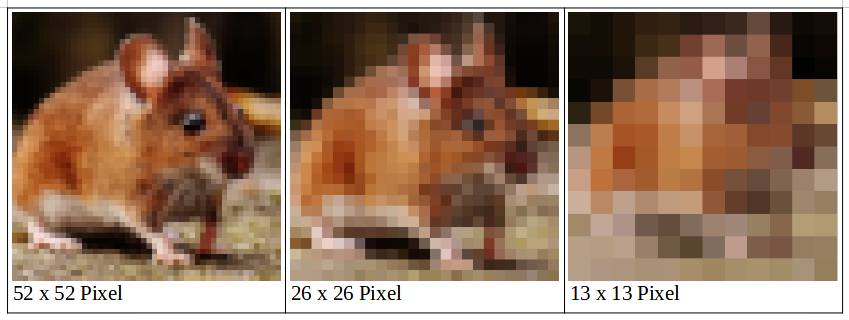

Beim MaxPooling wird kein Durchschnitt gebildet. Stattdessen kommt nur der jeweils größte Wert durch:


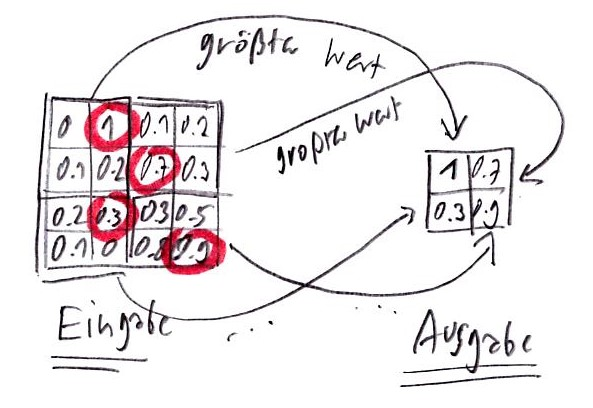



Das folgende Beispiel zeigt ein MaxPool2D-Solo:

In [ ]:
input_layer = Input((24,24,1))

x = MaxPool2D(2)(input_layer)

x = Flatten()(x)

output_layer = Dense(units=10)(x)

model = Model(input_layer, output_layer)

Die Ausgabe von `MaxPool2D(2)` ist 12 mal 12 groß (statt vorher 24 mal 24):

In [ ]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 24, 24, 1)]       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 1)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1450      
Total params: 1,450
Trainable params: 1,450
Non-trainable params: 0
_________________________________________________________________
